In [7]:
import numpy as np
from sklearn.datasets import make_circles
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

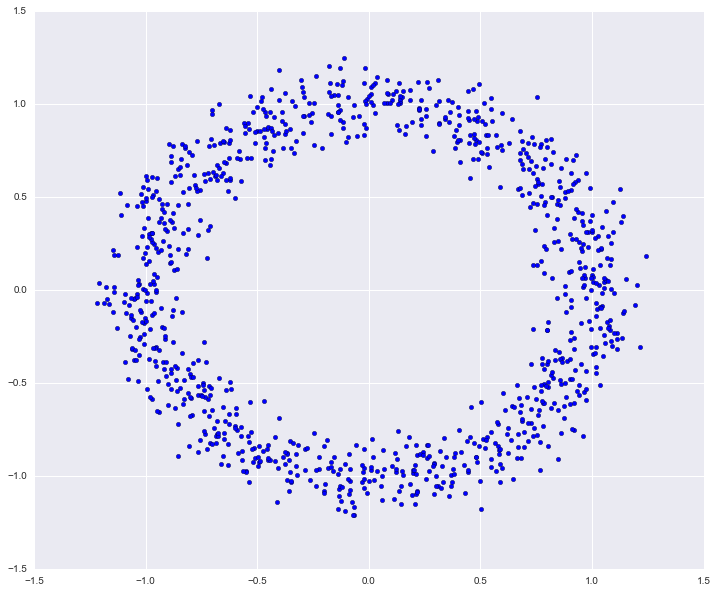

In [16]:
# this makes two circles, but if factor is 1, they're the same, we'll just ues that and have one circle.
circle, _ = make_circles(n_samples=1000, noise=0.1, factor=1)

plt.scatter(circle[:,0], circle[:,1])

In [20]:
p_index = circle[:,0].argmin()
p = circle[p_index]
p

array([-1.21532406, -0.07091575])

In [25]:
def mapper_filter(x):
    return np.linalg.norm(x - p, axis=1)

In [30]:
X = mapper_filter(circle)
X

array([ 1.10175526,  1.92003911,  0.78616532,  1.71975467,  1.63601543,
        2.07585437,  1.27161404,  0.16840053,  0.28996326,  1.45013543,
        1.90349856,  0.54370818,  2.37294188,  2.25011503,  0.61613745,
        0.33929717,  2.20083402,  2.0820785 ,  2.18773902,  2.05798143,
        2.20909883,  0.3584424 ,  2.1969376 ,  1.8960056 ,  0.65629035,
        0.66089772,  0.26548395,  1.51070259,  1.03535565,  0.29029856,
        2.10696273,  0.40693374,  2.27728545,  1.1695549 ,  1.09155827,
        2.03920833,  1.56404896,  2.06385803,  0.93301253,  1.96445773,
        2.29548258,  1.11445254,  0.64905184,  1.977709  ,  2.1652447 ,
        0.64089115,  1.57252718,  2.07618663,  0.40908059,  0.84104025,
        1.20524677,  2.11325437,  1.66548264,  0.7378137 ,  1.76817766,
        1.20617286,  1.55579556,  1.53116916,  1.05042367,  1.17455087,
        1.73701973,  2.04620746,  0.58444114,  2.1230898 ,  2.10945942,
        1.95517812,  1.85596857,  1.99977467,  0.71265805,  1.77

In [111]:
def cover(X, filter_fn=None, l=1, p=0.33):
    X_filtered = filter_fn(X)
    xmin, xmax = X_filtered.min(), X_filtered.max()
    #print('--', xmin, xmax)
    
    i = 0
    while True:
        left = max(i-p, xmin)
        right = min(i+l+p, xmax)
        #print('---- i, left right', i, left, right)
        
        idx = (X_filtered >= left) & (X_filtered <= right)
        yield (X[idx], idx)
        
        if right >= xmax:
            break
        i += l

In [130]:
import hdbscan
from sklearn.cluster import DBSCAN

import networkx as nx

G = nx.Graph()

last_nodes = {}

for i, (interval,interval_idx) in enumerate(cover(circle, filter_fn=mapper_filter, l=0.1, p=0.03)):
    clusterer = DBSCAN()
    #clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
    cluster_labels = clusterer.fit_predict(interval)
    
    # Add graph nodes
    for label in np.unique(cluster_labels):
        node_name = "interval%s_cluster%s" % (i, label)
        #print('--- node', node_name)
        G.add_node(node_name)

    # Connect edges from last iteration
    for data_idx,label in zip(interval_idx, cluster_labels):
        node_name = "interval%s_cluster%s" % (i, label)        
        if last_nodes.get(data_idx):
            G.add_edge(
                last_nodes.get(data_idx),
                node_name
            )
        
    last_nodes = {}    
    
    # Create new last_nodes dict
    for data_idx,label in zip(interval_idx, cluster_labels):
        node_name = "interval%s_cluster%s" % (i, label)        
        last_nodes[data_idx] = node_name

        
    # TODO need to link to last nodes
    
    #plt.figure()
    #plt.scatter(interval[:,0], interval[:,1])
    
    #print('---', interval.shape, np.unique(cluster_labels))

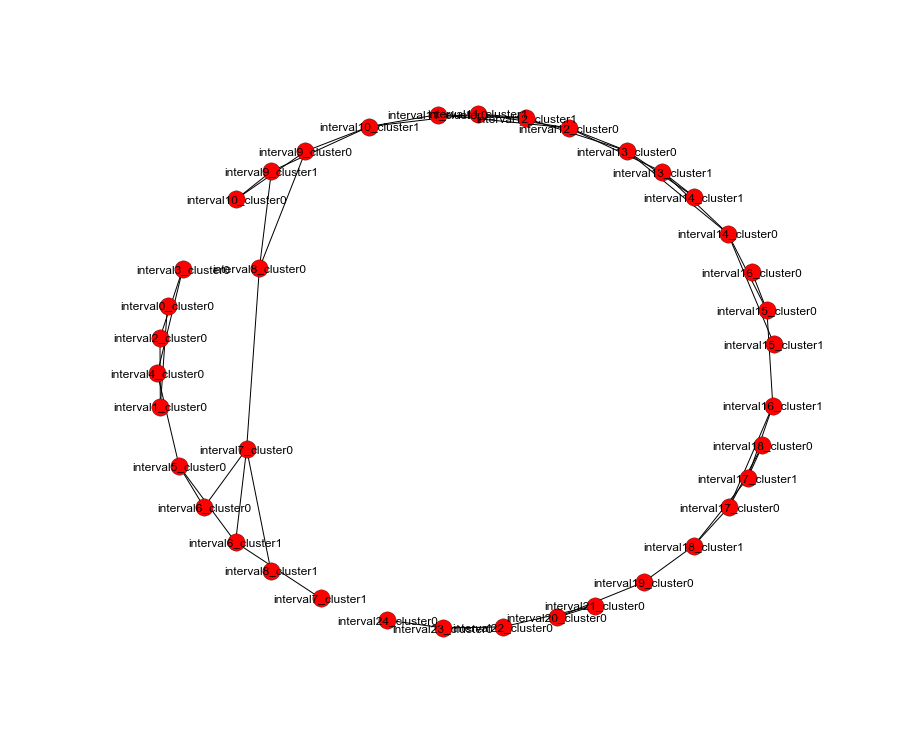

In [135]:
pos=nx.spring_layout(G, iterations=1000)

nx.draw(G, pos=pos)
nx.draw_networkx_labels(G, pos=pos);